---
## Classification Kaggle competition on titanic data  <br> <font size=3.4> Dataset:titanic.csv<br><font size=2>This is for the competition of Kaggle. EDA, visualisation, classification, and ensemble methods coevered.
---

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
#Importing the training dataset
train = pd.read_csv('../Ketan/Datasets/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Importing the testing dataset
test = pd.read_csv('../Ketan/Datasets/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


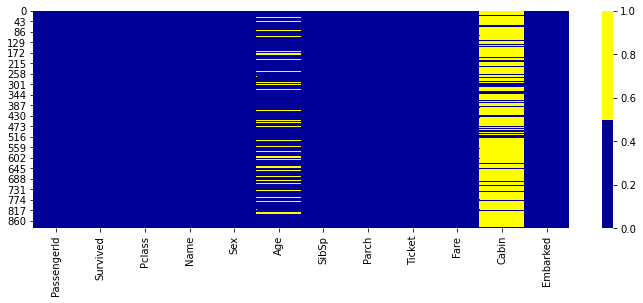

In [5]:
#Using heatmap to identofy the columns with null values
cols = train.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.figure(figsize=(12,4))
sns.heatmap(train[cols].isnull(),
            cmap=sns.color_palette(colours));

In [6]:
#Checking na values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Imputation of na values
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode().iloc[0])
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode().iloc[0])
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
#Checking duplicates
train[train.duplicated()].shape

(0, 12)

In [9]:
#Checking data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#Columns names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#Changing data type of Sex and Embarked to categorical variable
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')

In [12]:
#Dropping the unnecessary columns
train = train.drop(['Name','Ticket','Cabin'],axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [13]:
#Checking datatypes again
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

## Visualizing the data

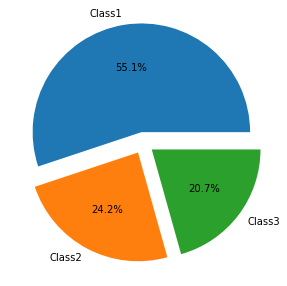

In [14]:
#Pie chart
a = train.Pclass.value_counts()
plt.figure(figsize=(8,5))
plt.pie(a, explode=[0.1,0.1,0.1], labels=['Class1','Class2','Class3'], autopct='%1.1f%%');

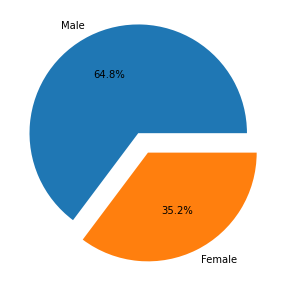

In [15]:
#Pie chart
b = train.Sex.value_counts()
plt.figure(figsize=(8,5))
plt.pie(b, explode=[0.1,0.1], labels=['Male','Female'], autopct='%1.1f%%');

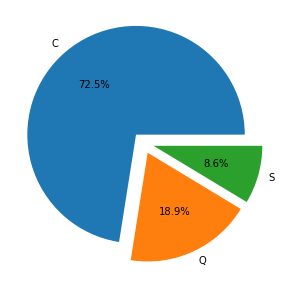

In [16]:
#Pie chart
c = train.Embarked.value_counts()
plt.figure(figsize=(8,5))
plt.pie(c, explode=[0.1,0.1,0.1], labels=['C','Q','S'], autopct='%1.1f%%');

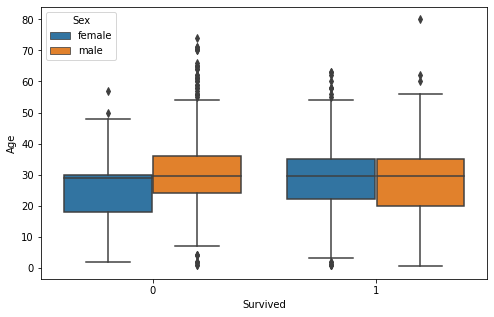

In [17]:
#Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y="Age",  data=train, hue='Sex');

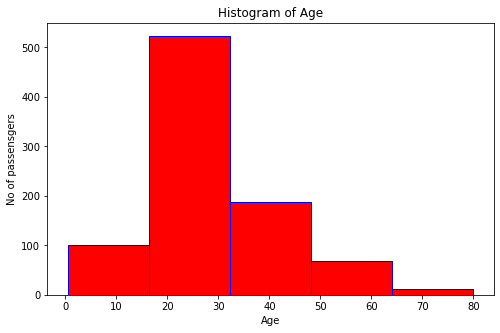

In [18]:
#Histogram
plt.figure(figsize=(8,5))
plt.hist(train.Age, color='red', edgecolor= 'blue', bins = 5)
plt.xlabel('Age')
plt.ylabel('No of passensgers')
plt.title('Histogram of Age');

In [19]:
#Getting dummies for the categorical variables
df = train.iloc[:,1:]
df1 = pd.get_dummies(df)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [20]:
#Renaming the columns
df1 = df1.rename({'Sex_female':'female','Sex_male':'male','Embarked_C':'C','Embarked_Q':'Q','Embarked_S':'S'},axis=1)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [21]:
#Dividing the dataset into X and Y
array = df1.values
X = array[:,1:11]
Y = array[:,0]

In [22]:
Y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

## Classification

### Trial-1: KNN<br><font size=2>Using grid search CV to decide best value for K

In [23]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.7117004582261001
{'n_neighbors': 22}


### Visualizing the result

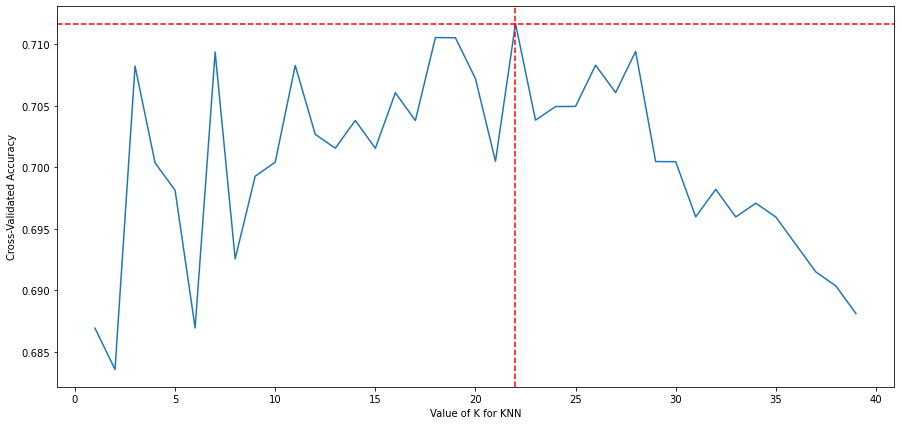

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.7117004582261001, color='r', linestyle='--')
plt.axvline(x=22, color='r', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
#KNN Classification
model = KNeighborsClassifier(n_neighbors=22)
model.fit(X,Y)
result = model.score(X, Y)
np.round(result, 4)

0.7452

### Trial 2: SVM Classification

In [26]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
#SVM Clasification
clf = SVC(C=1, kernel='linear')
clf.fit(X,Y)
result = clf.score(X, Y)
np.round(result, 4)

0.7868

In [28]:
#SVM Clasification
clf = SVC(C=1, kernel='rbf',gamma=0.9)
clf.fit(X,Y)
result = clf.score(X, Y)
np.round(result, 4)

0.9596

### Trial-3: Bagging

In [29]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X,Y)
result = model.score(X, Y)
np.round(result, 4)

0.982

### Trial-4: Boosting

In [30]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 200
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X,Y)
result = model.score(X, Y)
np.round(result, 4)

0.8485

### Trial-5: XGBoosting

In [31]:
#XGBoost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X,Y)
result = model.score(X, Y)
np.round(result, 4)

0.963

### Trial-6: Stacking

In [32]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [33]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC(C=1, kernel='rbf',gamma=0.9)
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X,Y)
result = ensemble.score(X, Y)
np.round(result, 4)

0.963

In [34]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X,Y)
result = ensemble.score(X, Y)
np.round(result, 4)

0.8653

In [35]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X,Y)
result = ensemble.score(X, Y)
np.round(result, 4)

0.8227

In [36]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X,Y)
result = ensemble.score(X, Y)
np.round(result, 4)

0.7071

### Hence our final model is bagging:

In [37]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X,Y)
result = model.score(X, Y)
np.round(result, 4)

0.982

In [38]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Same EDA operations performing on test dataset, which were performed on training dataset

In [39]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode().iloc[0])
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
test['Sex'] = test['Sex'].astype('category')
test['Embarked'] = test['Embarked'].astype('category')

In [42]:
test = test.drop(['Name','Ticket','Cabin'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


In [43]:
df2 = test.iloc[:,1:]
df3 = pd.get_dummies(df2)
df3

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [44]:
df3 = df3.rename({'Sex_female':'female','Sex_male':'male','Embarked_C':'C','Embarked_Q':'Q','Embarked_S':'S'},axis=1)
df3

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [45]:
array = df3.values
x= array[:,:]

In [46]:
x

array([[ 3.        , 34.5       ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 47.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        , 62.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.        , 38.5       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 30.27259036,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 30.27259036,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

### Predicting on test data set 

In [58]:
preds = model.predict(x) 

final = pd.Series(preds.astype('int8'))
finaldf = pd.DataFrame(final)
finaldf

,0
0,0
1,0
2,1
3,1
4,1
...,...
413,0
414,1
415,0
416,0


In [59]:
finaldf =  finaldf.rename({0:'Survived'},axis=1)
finaldf

,Survived
0,0
1,0
2,1
3,1
4,1
...,...
413,0
414,1
415,0
416,0


In [60]:
finaldf.Survived.value_counts()

0    280
1    138
Name: Survived, dtype: int64

In [61]:
combined = pd.concat([test,finaldf],axis=1)
combined

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.50000,0,0,7.8292,Q,0
1,893,3,female,47.00000,1,0,7.0000,S,0
2,894,2,male,62.00000,0,0,9.6875,Q,1
3,895,3,male,27.00000,0,0,8.6625,S,1
4,896,3,female,22.00000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,0
414,1306,1,female,39.00000,0,0,108.9000,C,1
415,1307,3,male,38.50000,0,0,7.2500,S,0
416,1308,3,male,30.27259,0,0,8.0500,S,0


In [62]:
result = combined[['Survived','PassengerId']]
result

,Survived,PassengerId
0,0,892
1,0,893
2,1,894
3,1,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [63]:
result.to_csv('file.csv',index=False)